In [49]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from KMeans import MyKMeans
from KMedian import MyKMedian

To compare the difference between K-Means and K-Median clustering, use the dataset with 2 blobs and 1 far away outlier, and a point in between that is closer to one of the blobs than the other.

<AxesSubplot:>

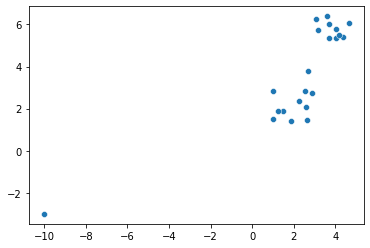

In [50]:
blob1 = [[2+random.uniform(-1,1), 2+random.uniform(-1,1)] for _ in range(10)]
blob2 = [[4+random.uniform(-1,1), 6+random.uniform(-1,1)] for _ in range(10)]
X = np.array([[2.7, 3.8], [-10, -3], [1.011912023516296, 1.5168927137365245], [1.4768066919949765, 1.8754986516362342], [2.642927166902791, 1.4562940293368125], [2.5167134689220223, 2.849968258665048], [2.240181553206663, 2.351547717099643], [1.854885951477039, 1.4181398385029436], [2.8683218751964823, 2.7406774558558125], [1.2196516709864358, 1.8706667633370344], [2.588948743983239, 2.0857729311504043], [1.0228060595545112, 2.8370028805016627], [3.0594857840379777, 6.249769356410191], [4.352088575764137, 5.398497609244089], [4.0434772464986874, 5.356281249931453], [4.153923999469697, 5.518232338796011], [3.7052999809994747, 5.3749119895658], [3.5850058576976997, 6.3890000400412115], [4.022855428829764, 5.79710406828867], [3.709147281766435, 6.016869663425296], [4.630218788223818, 6.047669295642667], [3.18227565221874, 5.72248662734559]])
sns.scatterplot(X[:,0], X[:, 1])

Text(0, 0.5, 'y')

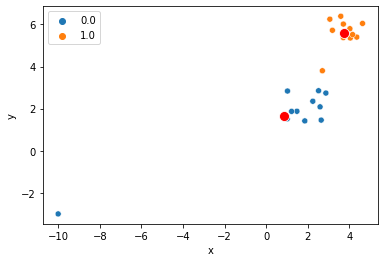

In [51]:
kmeans = MyKMeans()
kmeans.fit(X, 2)
centroids_kmeans, clusters_kmeans = kmeans.centroids, kmeans.clusters
sns.scatterplot(X[:,0], X[:, 1], hue=clusters_kmeans)
sns.scatterplot(centroids_kmeans[:,0], centroids_kmeans[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

From above, because K-Means chooses the mean of all points in a cluster to be the centroid, the left cluster's centroid is dragged towards the left because of the outlier. As a result, the point between the 2 clusters is clustered with the right cluster even though it is closer to the left cluster.

Text(0, 0.5, 'y')

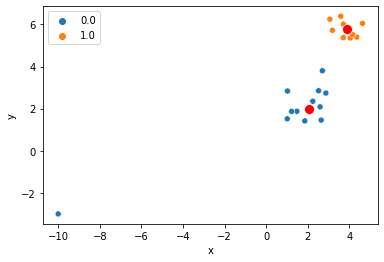

In [52]:
kmedian = MyKMedian()
kmedian.fit(X, 2)
centroids_kmedian, clusters_kmedian = kmedian.centroids, kmedian.clusters
sns.scatterplot(X[:,0], X[:, 1], hue=clusters_kmedian)
sns.scatterplot(centroids_kmedian[:,0], centroids_kmedian[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

On the other hand, K-Median chooses the centroid using the medians of all points, so the outlier is irrelevant and so the middle point is clustered in its closest cluster.